<a href="https://colab.research.google.com/github/jmofarias/machine_learning/blob/master/agrupamento_cancer_de_pulmao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando Agrupamento**

* Dataset com dados referentes ao câncer de pulmão.
* [Long Cancer](https://www.kaggle.com/yusufdede/lung-cancer-dataset)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 1. Importando Bibliotecas

In [2]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

## 2. Leitura dos dados utilizando a biblioteca Pandas

In [3]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/lung_cancer_examples.csv')

In [4]:
dados.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


## 3. Limpeza e organização dos dados

In [5]:
# excluir colunas irrelevantes
dados = dados.drop(columns=['Name', 'Surname'])
dados.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


## 4. Re-escala dos dados

In [7]:
# re-escala dos dados
dados = (dados - dados.min())/(dados.max()-dados.min())

## 5. Organização dos dados para modelagem

In [9]:
# dados em atributos descritores e de classe
x = dados.iloc[:,0:4]
x.head()

,Age,Smokes,AreaQ,Alkhol
0,0.288136,0.088235,0.444444,0.500
1,0.152542,0.588235,0.111111,0.625
2,0.203390,0.000000,0.444444,0.250
3,0.169492,0.000000,0.777778,0.125
4,0.847458,0.117647,0.444444,0.750


In [10]:
# dados em atributos de classe
y = dados.Result
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Result, dtype: float64

## 6. Algoritmo de agrupamento

### Criação do modelo e ajuste dos dados

In [11]:
# agrupamento
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Modelo sobre os dados de teste

In [12]:
kmeans_labels = kmeans.predict(x)
kmeans_labels

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int32)

### Visualização dos resultados

In [13]:
x = x.reset_index(drop=True)

In [16]:
# adicionando as labels ao teste
grupos = pd.DataFrame(kmeans_labels)
x.insert((x.shape[1]),'Result',grupos)

In [17]:
benigno = x[x['Result']==0]
maligno = x[x['Result']==1]

In [23]:
plt.rcParams["figure.figsize"] = (8,5)

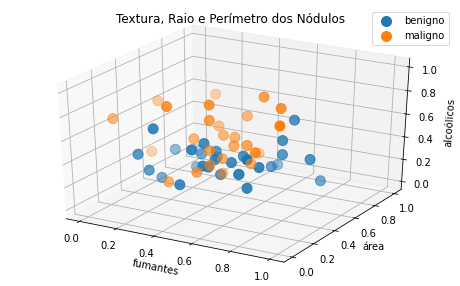

In [26]:
# plotando alguns atributos das classes
ax = plt.axes(projection='3d')
ax.scatter3D(benigno.Smokes,benigno.AreaQ,benigno.Alkhol,s=100,label='benigno')
ax.scatter3D(maligno.Smokes,maligno.AreaQ,maligno.Alkhol,s=100,label='maligno')
plt.legend()
ax.set_xlabel('fumantes')
ax.set_ylabel('área')
ax.set_zlabel('alcoólicos')
plt.title('Fumantes, Área e Alcoólicos')
plt.show()

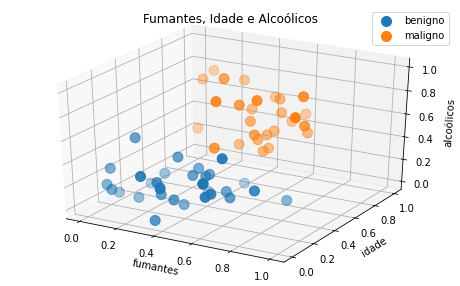

In [27]:
ax = plt.axes(projection='3d')
ax.scatter3D(benigno.Smokes,benigno.Age,benigno.Alkhol,s=100,label='benigno')
ax.scatter3D(maligno.Smokes,maligno.Age,maligno.Alkhol,s=100,label='maligno')
plt.legend()
ax.set_xlabel('fumantes')
ax.set_ylabel('idade')
ax.set_zlabel('alcoólicos')
plt.title('Fumantes, Idade e Alcoólicos')
plt.show()

In [28]:
plt.rcParams["figure.figsize"] = (25,20)

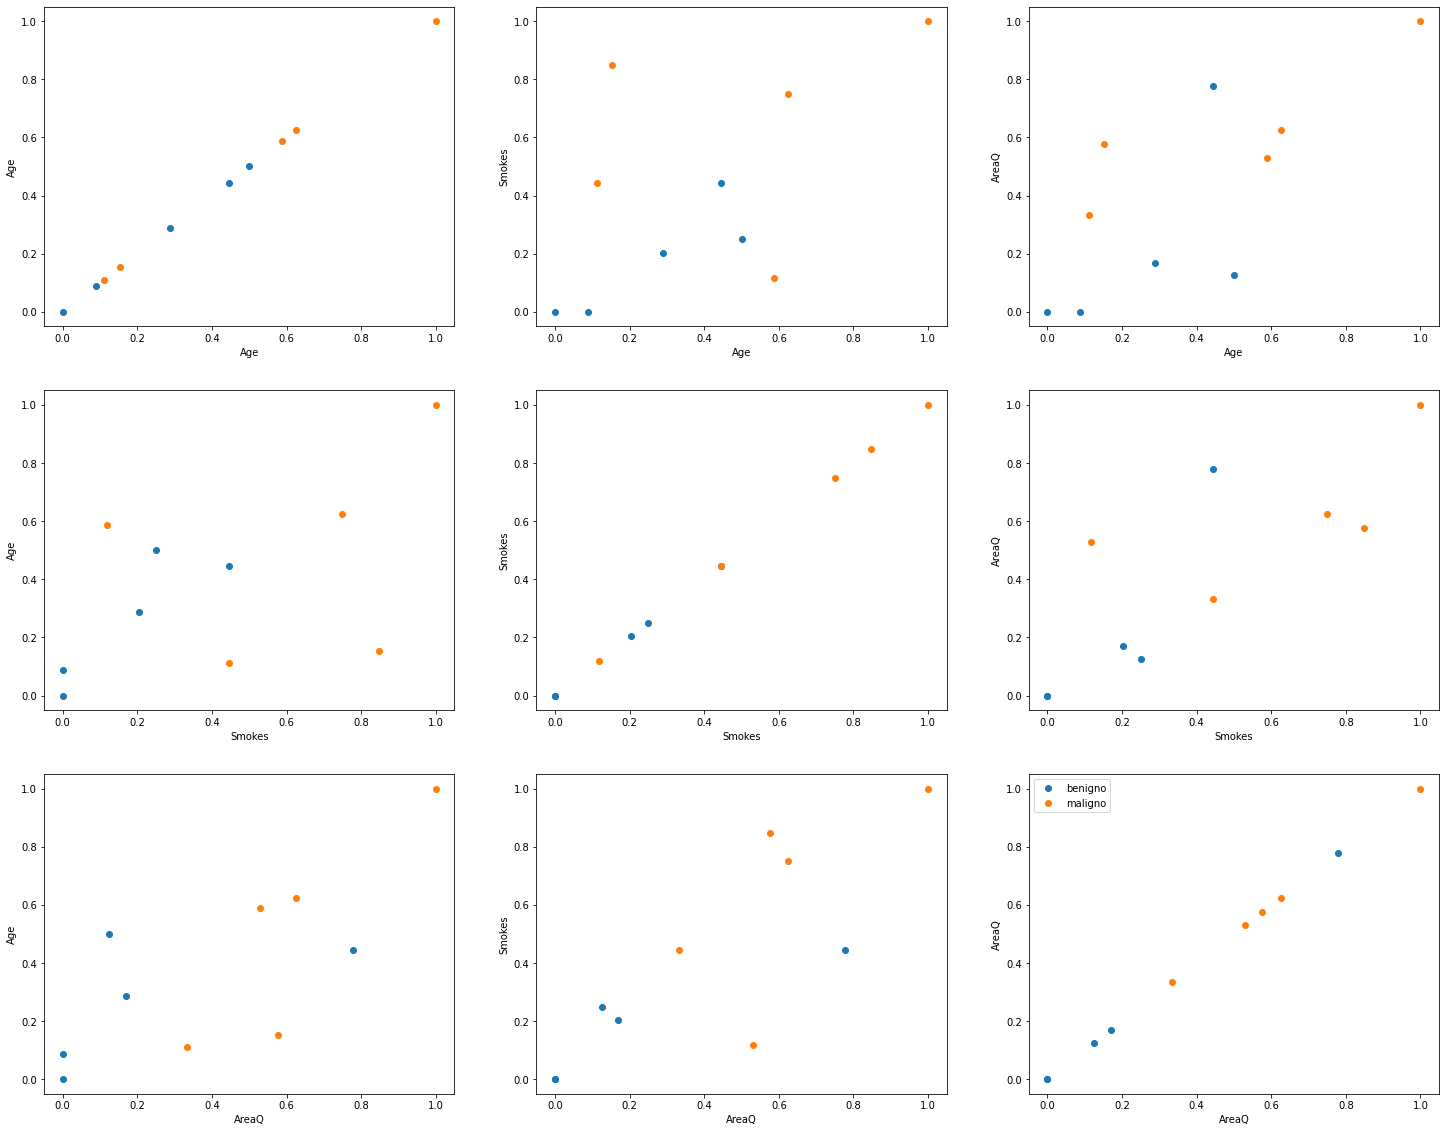

In [33]:
# plotando a comparação de alguns atributos
fig, axs = plt.subplots(3,3)
for i in range(3):
  for j in range(3):
    axs[i,j].scatter(benigno.iloc[i],benigno.iloc[j],label='benigno')
    axs[i,j].scatter(maligno.iloc[i],maligno.iloc[j],label='maligno')
    axs[i,j].set(xlabel=x.columns[i],ylabel=x.columns[j])
plt.legend()
plt.show()

## 7. Avaliando modelo

### Acurácia

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
acuracia = accuracy_score(y,kmeans_labels)
round(acuracia,3)

0.983

### Índice Rand Ajustado

In [36]:
from sklearn.metrics import adjusted_rand_score

In [37]:
rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

0.9321935460948325

### Scores baseados em informação mútua

In [39]:
from sklearn.metrics import adjusted_mutual_info_score

In [40]:
mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

0.8910974784396462

### Fowlkes-Mallows scores

In [41]:
from sklearn.metrics import fowlkes_mallows_score

In [42]:
fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.965683178276757

## 8. Métricas para classes não conhecidas

### Índice Davies-Boldin


In [43]:
# removendo a coluna resultado
x = x.drop(columns=['Result'])

In [44]:
from sklearn.metrics import davies_bouldin_score

In [45]:
db = davies_bouldin_score(x,kmeans_labels)
db

0.9765901528140738

### Coeficiente de Silhueta


In [47]:
from sklearn.metrics import silhouette_score

In [49]:
ss = silhouette_score(x,kmeans_labels,metric='euclidean')
ss

0.4186736584264156

### Índice Calinski-Harabasz 


In [50]:
from sklearn.metrics import calinski_harabasz_score

In [52]:
ch = calinski_harabasz_score(x,kmeans_labels)
ch

52.43059031924216

## 9. Agrupamento hierárquico

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
# definição do modelo e agrupamento
hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(x).labels_

In [56]:
labels_hierarquico

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

### Avaliando modelo


In [57]:
# acurácia
acuracia = accuracy_score(y,labels_hierarquico)
round(acuracia,3)

0.034

In [58]:
# índice rand ajustado
rand_score = adjusted_rand_score(y,labels_hierarquico)
rand_score

0.8667389037902627

In [59]:
# índice baseado em informação mútua
mutual_info = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info

0.816252464401381

In [60]:
# índice Fowlkes Mallows
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.932799233618174

In [62]:
# índice Davies-Boldin
db = davies_bouldin_score(x,labels_hierarquico)
db

0.9798301777233183

In [64]:
# coeficiente de silhueta
ss = silhouette_score(x,labels_hierarquico,metric='euclidean')
ss

0.4188465961234816

In [66]:
# índice de Calinski-Harabasz
ch = calinski_harabasz_score(x,labels_hierarquico)
ch

52.14559441435971